## Plot ROMS data

In [2]:
import statistics

import salem
import warnings

import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import plotnine
from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap
import matplotlib
import cmocean
import seaborn as sns
import folium

import numpy as np
import pandas as pd
import xarray as xr
from scipy import stats
import datetime as dt
from shapely.geometry import Point, Polygon


import glob

In [3]:
# import shapefiles

# MPA shapefile
ca_mpas = gpd.GeoDataFrame.from_file("../MPA_dataview_prototype/Data/Shapefiles/mpas/all_mpas/ca_all_mpas.shp")
ca_mpa_bioregions = gpd.GeoDataFrame.from_file("../MPA_dataview_prototype/Data/Shapefiles/mpas/by_bioregion/ca_mpa_bioregions.shp")

# Bioregions shapefile
ca_bioregions = gpd.GeoDataFrame.from_file("../MPA_dataview_prototype/Data/Shapefiles/state_waters_bioregions/ca_state_waters.shp")

# California state waters shapefile
ca_statewaters = gpd.GeoDataFrame.from_file("../MPA_dataview_prototype/Data/Shapefiles/state_waters_bioregions/ca_state_waters_all.shp")


In [37]:
# subset relevant parts of shapefiles

# North Coast MPAs (SMRs) - non-estuary
mpa_readingrock_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Reading Rock SMR"]
mpa_southhumboldtbay_smrma_shape = ca_mpas[ca_mpas['MPA_NAME'] == "South Humboldt Bay SMRMA"]
mpa_capemendocino_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "South Cape Mendocino SMR"]
mpa_mattolecanyon_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Mattole Canyon SMR"]
mpa_sealiongulch_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Sea Lion Gulch SMR"]
mpa_tenmile_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Ten Mile SMR"]
mpa_pointcabrillo_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Cabrillo SMR"]
mpa_pointarena_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Arena SMR"]
mpa_delmar_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Del Mar Landing SMR"]
mpa_stewartspoint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Stewarts Point SMR"]
mpa_gerstlecove_smrma_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Gerstle Cove SMR"]
mpa_bodegahead_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Bodega Head SMR"]
mpa_pointreyes_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Reyes SMR"]
mpa_northfarallon_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "North Farallon Islands SMR"]
mpa_southeastfarallon_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Southeast Farallon Island SMR"]

# Central Coast MPAs (SMRs) - non-estuary

mpa_anonuevo_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Año Nuevo SMR"]
mpa_naturalbridges_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Natural Bridges SMR"]
mpa_asilomar_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Asilomar SMR"]
mpa_pinnacles_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Carmel Pinnacles SMR"]
mpa_pointlobos_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Lobos SMR"]
mpa_pointsur_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Sur SMR"]
mpa_bigcreek_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Big Creek SMR"]
mpa_piedrasblancas_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Piedras Blancas SMR"]
mpa_morrobay_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Morro Bay SMR"]
mpa_buchon_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Buchon SMR"]
mpa_vandenberg_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Vandenberg SMR"]


# South Coast MPAs (SMRs) - non-estuary
mpa_pointconception_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Conception SMR"]
mpa_pointdume_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Point Dume SMR"]
mpa_lagunabeach_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Laguna Beach SMR"]
mpa_pinnacles_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Carmel Pinnacles SMR"]
mpa_matlahuayl_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Matlahuayl SMR"]
mpa_lajolla_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "South La Jolla SMR"]
mpa_cabrillo_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Cabrillo SMR"]


# Channel Island MPAs (SMRs)
mpa_richardsonrock_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Richardson Rock SMR"]
mpa_harrispoint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Harris Point SMR"]
mpa_judithpoint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Judith Rock SMR"]
mpa_carringtonpoint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Carrington Point SMR"]
mpa_skunkpoint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Skunk Point SMR"]
mpa_southpoint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "South Point SMR"]
mpa_gullisland_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Gull Island SMR"]
mpa_scorpion_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Scorpion SMR"]
mpa_anacapa_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Anacapa Island SMR"]
mpa_footprint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Footprint SMR"]
mpa_beggrock_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Begg Rock SMR"]
mpa_santabarbara_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Santa Barbara Island SMR"]
mpa_longpoint_smr_shape = ca_mpas[ca_mpas['MPA_NAME'] == "Long Point SMR"]

# All MPAs by bioregions
mpa_northcoast_shape = ca_mpa_bioregions[ca_mpa_bioregions['NAME'] == 'North_Coast_MPAs']
mpa_centralcoast_shape = ca_mpa_bioregions[ca_mpa_bioregions['NAME'] == 'Central_Coast_MPAs']
mpa_southcoast_shape = ca_mpa_bioregions[ca_mpa_bioregions['NAME'] == 'South_Coast_MPSs']
mpa_channelislands_shape = ca_mpa_bioregions[ca_mpa_bioregions['NAME'] == 'Channel_Island_MPAs']


# Bioregions
bioregion_northcoast_shape = ca_bioregions[ca_bioregions['NAME'] == "North_Coast"]
bioregion_centralcoast_shape = ca_bioregions[ca_bioregions['NAME'] == "Central_Coast"]
bioregion_southcoast_shape = ca_bioregions[ca_bioregions['NAME'] == "South_Coast"]
bioregion_channelislands_shape = ca_bioregions[ca_bioregions['NAME'] == "Channel_Islands"]

In [20]:
# function to clean ROMS dataset
# create a functional datetime from the year and month variables and make it a coordinate
# move longitude and latitude from data variables and into coordinates
# drop other unnecessary coordinates

def import_roms_data(dataset_path, variable):
    ds = xr.open_dataset(dataset_path)
    ds.coords['time'] = np.array([dt.datetime(int(yr),int(mnth),15) for yr, mnth in zip(ds['year'].values, ds['month'].values)])
    ds['latitude'] = ds['lat'].values[:,0]
    ds['longitude'] = ds['lon'].values[0,:]
    ds = (ds.set_coords(['longitude','latitude','time'])
          .drop(['lon', 'lat','year','month'])
     )
#     ds[variable] = ds[variable].assign_coords(time = time)
    return(ds)

In [21]:
# import ROMS datasets from files

roms_sst = import_roms_data("../Raw_Data/ROMS/temp_surface_monthly_roms_gfdl_1980_2100.nc", 'sst')
roms_chl = import_roms_data("../Raw_Data/ROMS/chl_surface_monthly_roms_gfdl_1980_2100.nc", 'chl_surf')

In [22]:
# calculate annual summary statistics for each pixel: mean and max SST, mean Chl

annual_mean_sst = (roms_sst.drop(['roms_time'])
                       .groupby('time.year')
                       .mean(dim = 'time', skipna = True)
                  )

annual_max_sst = (roms_sst.drop(['roms_time'])
                       .groupby('time.year')
                       .max(dim = 'time', skipna = True)
                  )

annual_mean_chl = (roms_chl.drop(['roms_time'])
                       .groupby('time.year')
                       .mean(dim = 'time', skipna = True)
                  )

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [23]:
# function to calculate change between two years in a summary statistic from dataset

def calculate_abs_change(dataset, variable, start_year, end_year):
    change_variable = str(variable + '_change')
    timeframe_dimension = str('change_' + str(start_year) + '-' + str(end_year))
    change_ds = ((dataset.sel(year = end_year)[variable] - dataset.sel(year = start_year)[variable])
                     .to_dataset()
                     .rename_vars({variable : change_variable})
                )
    change_ds.coords['timeframe'] = timeframe_dimension
    change_ds[change_variable] = change_ds[change_variable].assign_coords(timeframe = timeframe_dimension)

    
    return change_ds


def calculate_pct_change(dataset, variable, start_year, end_year):
    change_variable = str(variable + '_change')
    timeframe_dimension = str('change_' + str(start_year) + '-' + str(end_year))
    change_ds = (((dataset.sel(year = end_year)[variable] - dataset.sel(year = start_year)[variable])/dataset.sel(year = start_year)[variable])
                     .to_dataset()
                     .rename_vars({variable : change_variable})
                )
    change_ds.coords['timeframe'] = timeframe_dimension
    change_ds[change_variable] = change_ds[change_variable].assign_coords(timeframe = timeframe_dimension)

    
    return change_ds

In [24]:
# create dataset with the change in annual mean/max SST and mean Chl from different years
# right now, years of interest are past decadal change: 2000-2010, 2010-2020
# and short-term (decadal): 2020-2030, and long-term 2020-2100 predictions
# could automate this a little better: write function to do this for selected years?

annual_mean_sst_change = xr.concat([calculate_abs_change(annual_mean_sst, 'sst', 2000, 2009),
                                    calculate_abs_change(annual_mean_sst, 'sst', 2010, 2019),
                                    calculate_abs_change(annual_mean_sst, 'sst', 2020, 2029),
                                    calculate_abs_change(annual_mean_sst, 'sst', 2090, 2099)
                                   ], dim = 'timeframe'
                                  )

annual_max_sst_change = xr.concat([calculate_abs_change(annual_max_sst, 'sst', 2000, 2009),
                                   calculate_abs_change(annual_max_sst, 'sst', 2010, 2019),
                                   calculate_abs_change(annual_max_sst, 'sst', 2020, 2029),
                                   calculate_abs_change(annual_max_sst, 'sst', 2090, 2099)
                                  ], dim = 'timeframe'
                                  )

annual_mean_chl_change = xr.concat([calculate_pct_change(annual_mean_chl, 'chl_surf', 2000, 2009),
                                    calculate_pct_change(annual_mean_chl, 'chl_surf', 2010, 2019),
                                    calculate_pct_change(annual_mean_chl, 'chl_surf', 2020, 2029),
                                    calculate_pct_change(annual_mean_chl, 'chl_surf', 2090, 2099)
                                   ], dim = 'timeframe'
                                  )
    

In [25]:
# extract the data for the bioregion shapefiles

# North Coast
northcoast_mean_sst_change = annual_mean_sst_change.salem.roi(shape = bioregion_northcoast_shape, all_touched = True)
northcoast_max_sst_change = annual_max_sst_change.salem.roi(shape = bioregion_northcoast_shape, all_touched = True)
northcoast_mean_chl_change = annual_mean_chl_change.salem.roi(shape = bioregion_northcoast_shape, all_touched = True)

# Central Coast
centralcoast_mean_sst_change = annual_mean_sst_change.salem.roi(shape = bioregion_centralcoast_shape, all_touched = True)
centralcoast_max_sst_change = annual_max_sst_change.salem.roi(shape = bioregion_centralcoast_shape, all_touched = True)
centralcoast_mean_chl_change = annual_mean_chl_change.salem.roi(shape = bioregion_centralcoast_shape, all_touched = True)

# South Coast
southcoast_mean_sst_change = annual_mean_sst_change.salem.roi(shape = bioregion_southcoast_shape, all_touched = True)
southcoast_max_sst_change = annual_max_sst_change.salem.roi(shape = bioregion_southcoast_shape, all_touched = True)
southcoast_mean_chl_change = annual_mean_chl_change.salem.roi(shape = bioregion_southcoast_shape, all_touched = True)

# Channel Islands
channelislands_mean_sst_change = annual_mean_sst_change.salem.roi(shape = bioregion_channelislands_shape, all_touched = True)
channelislands_max_sst_change = annual_max_sst_change.salem.roi(shape = bioregion_channelislands_shape, all_touched = True)
channelislands_mean_chl_change = annual_mean_chl_change.salem.roi(shape = bioregion_channelislands_shape, all_touched = True)


----

# Whole ROMS Model: Change by time period 

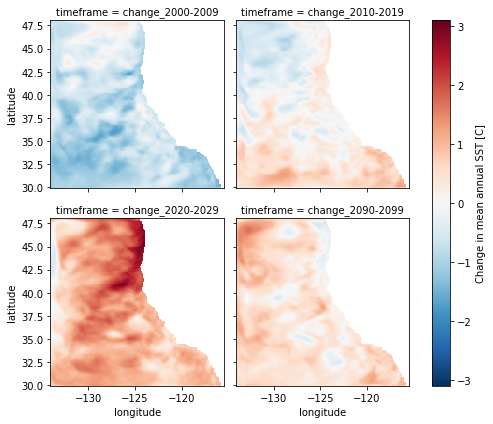

In [10]:
plot_mean_sst = annual_mean_sst_change['sst_change'].plot(x = 'longitude', 
                                                          y = 'latitude', 
                                                          col = 'timeframe', 
                                                          col_wrap = 2,
                                                          cbar_kwargs={"label": 'Change in mean annual SST [C]', "spacing": "proportional"}
                                                         )

#plot_mean_sst.savefig('Figures/ROMS_plots/wholemodel_meanSST.png')

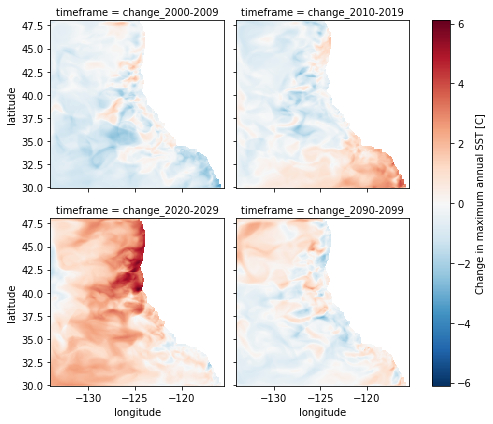

In [11]:
plot_max_sst = annual_max_sst_change['sst_change'].plot(x = 'longitude', 
                                                          y = 'latitude', 
                                                          col = 'timeframe', 
                                                          col_wrap = 2,
                                                          cbar_kwargs={"label": 'Change in maximum annual SST [C]', "spacing": "proportional"}
                                                         )

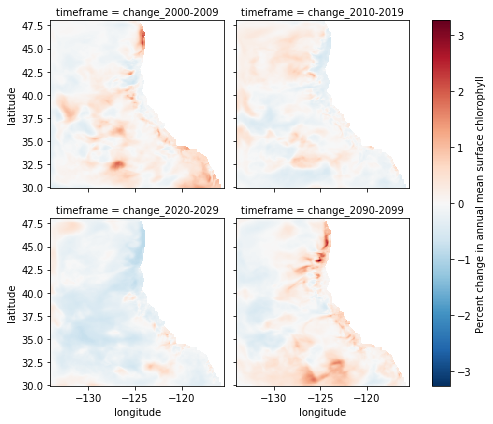

In [12]:
plot_mean_chl = annual_mean_chl_change['chl_surf_change'].plot(x = 'longitude', 
                                                          y = 'latitude', 
                                                          col = 'timeframe', 
                                                          col_wrap = 2,
                                                          cbar_kwargs={"label": 'Percent change in annual mean surface chlorophyll', "spacing": "proportional"}
                                                         )

----

# Change by time period and bioregion

### Mean SST

Text(0.5, 0.98, 'Change in mean annual SST from change_2000-2009')

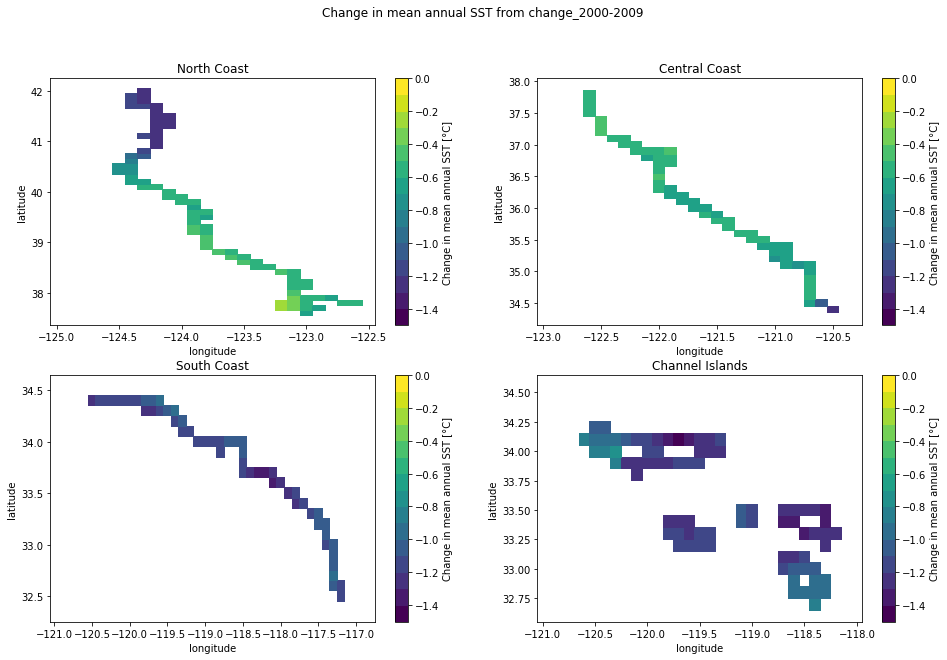

In [13]:
# Plot changes in mean SST for 2000-2009


fig_mean_sst_2000, axes = plt.subplots(ncols = 2, nrows = 2)
# fig_mean_sst_2000, axes = plt.subplots(ncols = 2, nrows = 2, subplot_kw = {'projection': ccrs.PlateCarree()})
fig_mean_sst_2000.set_size_inches(16,10)

# ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='#BABABA'),zorder=10)

fig1 = (northcoast_mean_sst_change['sst_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.5,0.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)



fig2 = (centralcoast_mean_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.5,0.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.5,0.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.5,0.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_mean_sst_2000.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_sst_2000.suptitle('Change in mean annual SST from change_2000-2009') 


# save figure to file
# fig_mean_sst_2000.savefig('Figures/ROMS_plots/bioregions_meanSST_2000_2009.png')


Text(0.5, 0.98, 'Change in mean annual SST from 2010-2019')

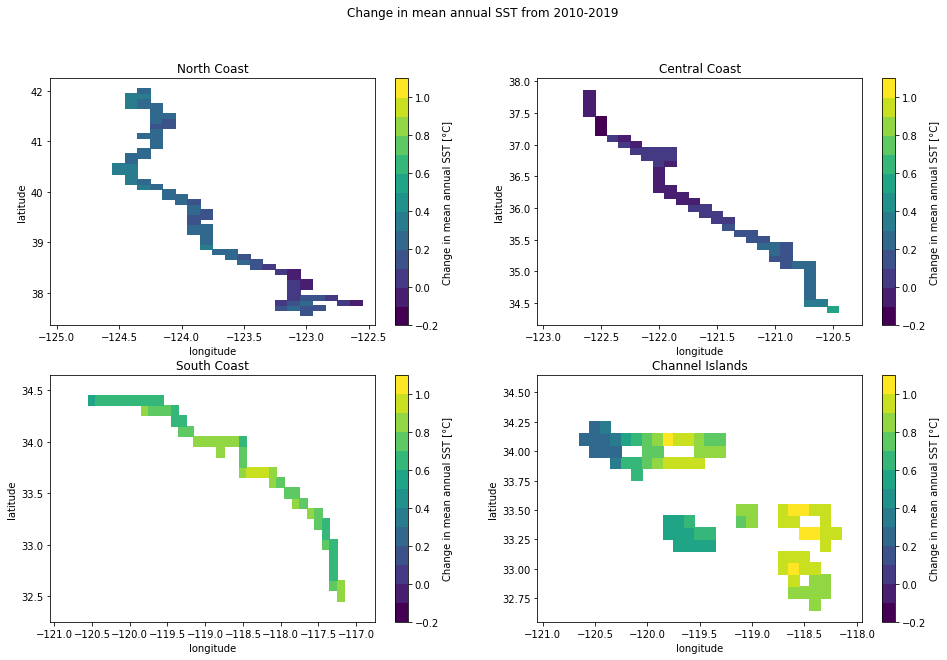

In [14]:
# Plot of change in annual SST, from 2010-2019

fig_mean_sst_2010, axes = plt.subplots(ncols = 2, nrows = 2)
fig_mean_sst_2010.set_size_inches(16,10)

fig1 = (northcoast_mean_sst_change['sst_change'].sel(latitude = slice(37.4,  42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.2,1.2,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)



fig2 = (centralcoast_mean_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.2,1.2,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.2,1.2,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.2,1.2,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_mean_sst_2010.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_sst_2010.suptitle('Change in mean annual SST from 2010-2019') 

# save figure to file
# fig_mean_sst_2010.savefig('Figures/ROMS_plots/bioregions_meanSST_2010_2019.png')


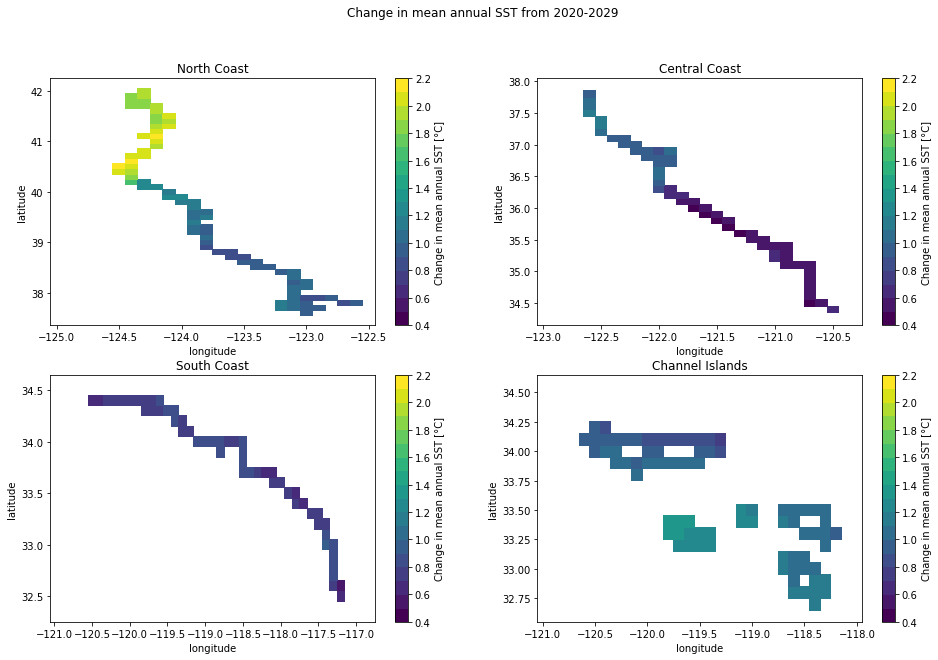

In [15]:
# Plot of change in annual SST, from 2020-2029

fig_mean_sst_2020, axes = plt.subplots(ncols = 2, nrows = 2)
fig_mean_sst_2020.set_size_inches(16,10)

fig1 = (northcoast_mean_sst_change['sst_change'].sel(latitude = slice(37.4,  42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(0.4,2.3,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[0,0]
          )
)



fig2 = (centralcoast_mean_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(0.4,2.3,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(0.4,2.3,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(0.4,2.3,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_mean_sst_2020.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_sst_2020.suptitle('Change in mean annual SST from 2020-2029') 

# save figure to file
fig_mean_sst_2020.savefig('Figures/ROMS_plots/bioregions_meanSST_2020_2029.png')


Text(0.5, 0.98, 'Change in mean annual SST from 2090-2099')

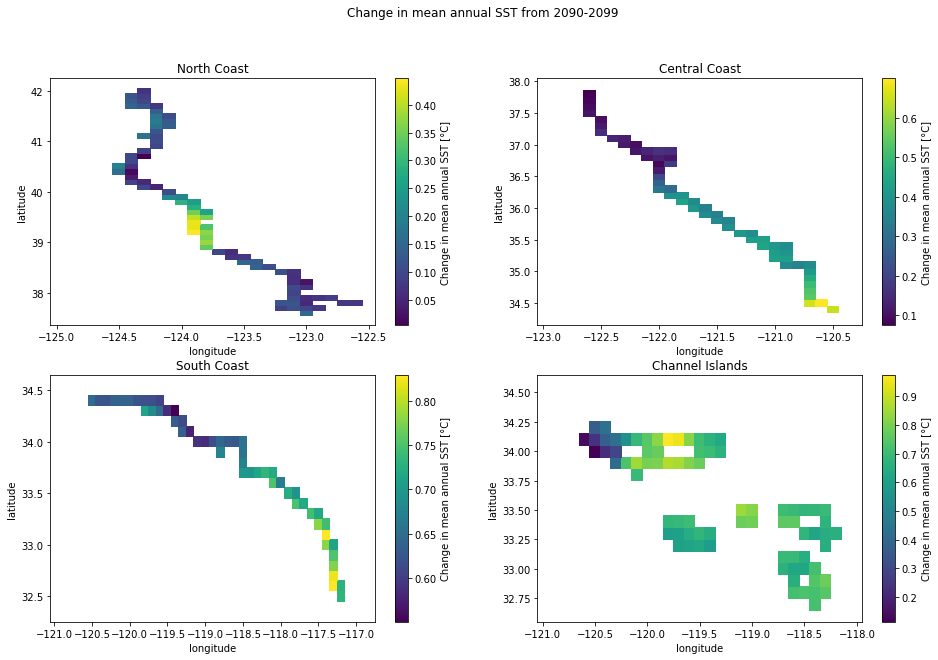

In [16]:
# Plot of change in annual SST, from 2090-2099

fig_mean_sst_2090, axes = plt.subplots(ncols = 2, nrows = 2)
fig_mean_sst_2090.set_size_inches(16,10)
# ax_nc = plt.axes(projection=ccrs.PlateCarree())


# axes[0,0].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='#BABABA'),zorder=10)

fig1 = (northcoast_mean_sst_change['sst_change'].sel(latitude = slice(37.4,  42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.7,3.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[0,0]
          )
)



fig2 = (centralcoast_mean_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.7,3.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.7,3.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.7,3.1,.1),
           cbar_kwargs = {'label': 'Change in mean annual SST [°C]'},
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')
# axes[0,0].add_feature(coast_10m)


fig_mean_sst_2090.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_sst_2090.suptitle('Change in mean annual SST from 2090-2099') 

# fig_mean_sst_2090.savefig('Figures/ROMS_plots/bioregions_meanSST_2090_2099.png')



---
### Maximum SST

Text(0.5, 0.98, 'Change in maximum annual SST from 2000-2009')

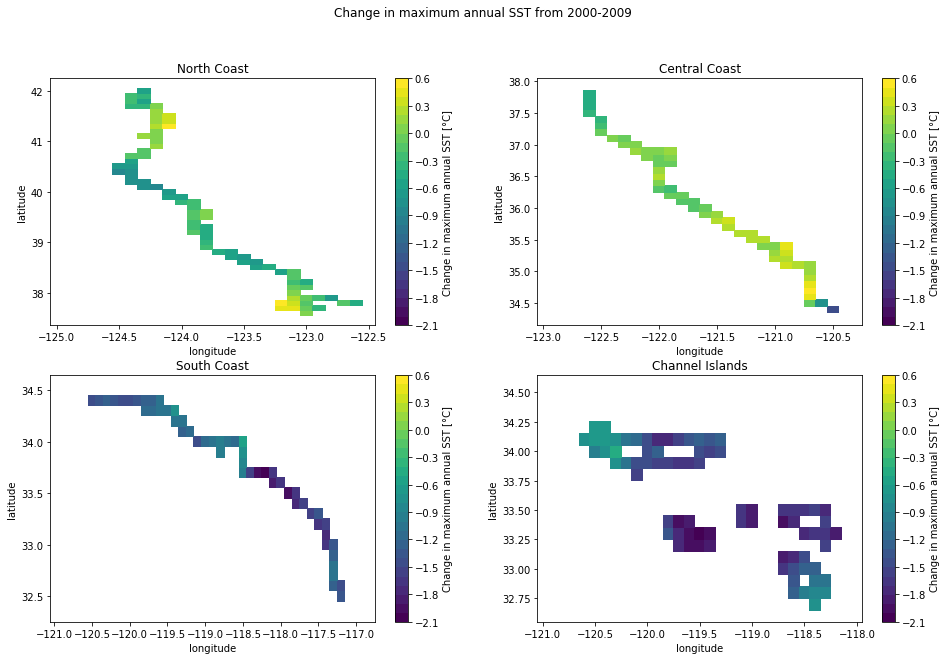

In [17]:
# Plot of change in annual maximum SST, from 2000-2009

fig_max_sst_2000, axes = plt.subplots(ncols = 2, nrows = 2)
fig_max_sst_2000.set_size_inches(16,10)

fig1 = (northcoast_max_sst_change['sst_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-2.1,0.7,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)


fig2 = (centralcoast_max_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-2.1,0.7,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_max_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-2.1,0.7,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_max_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-2.1,0.7,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_max_sst_2000.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_max_sst_2000.suptitle('Change in maximum annual SST from 2000-2009') 

# fig_max_sst_2000.savefig('Figures/ROMS_plots/bioregions_maxSST_2000_2009.png')


Text(0.5, 0.98, 'Change in maximum annual SST from 2010-2019')

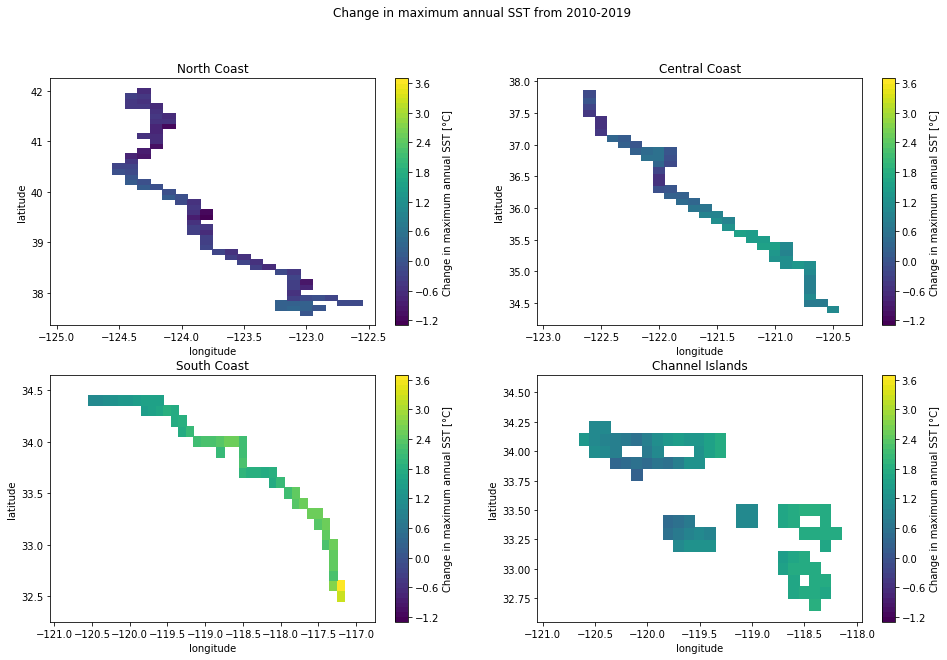

In [18]:
# Plot of change in annual maximum SST, from 2010-2019

fig_max_sst_2010, axes = plt.subplots(ncols = 2, nrows = 2)
fig_max_sst_2010.set_size_inches(16,10)

fig1 = (northcoast_max_sst_change['sst_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.3,3.8,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)

fig2 = (centralcoast_max_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.3,3.8,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_max_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.3,3.8,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_max_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-1.3,3.8,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_max_sst_2010.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_max_sst_2010.suptitle('Change in maximum annual SST from 2010-2019') 

# fig_max_sst_2010.savefig('Figures/ROMS_plots/bioregions_maxSST_2010_2019.png')


Text(0.5, 0.98, 'Change in maximum annual SST from 2020-2029')

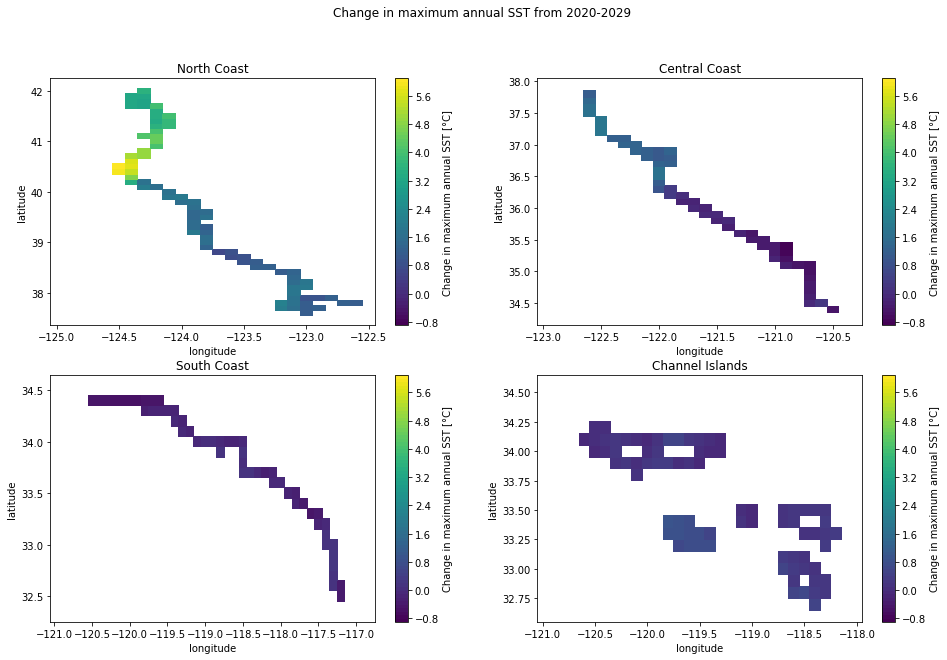

In [19]:
# Plot of change in annual maximum SST, from 2020-2029


fig_max_sst_2020, axes = plt.subplots(ncols = 2, nrows = 2)
fig_max_sst_2020.set_size_inches(16,10)

fig1 = (northcoast_max_sst_change['sst_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-.9,6.2,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)

fig2 = (centralcoast_max_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-.9,6.2,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_max_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-.9,6.2,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_max_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-.9,6.2,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_max_sst_2020.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_max_sst_2020.suptitle('Change in maximum annual SST from 2020-2029') 

# fig_mean_sst_2020.savefig('Figures/ROMS_plots/bioregions_maxSST_2020_2029.png')


Text(0.5, 0.98, 'Change in maximum annual SST from 2090-2099')

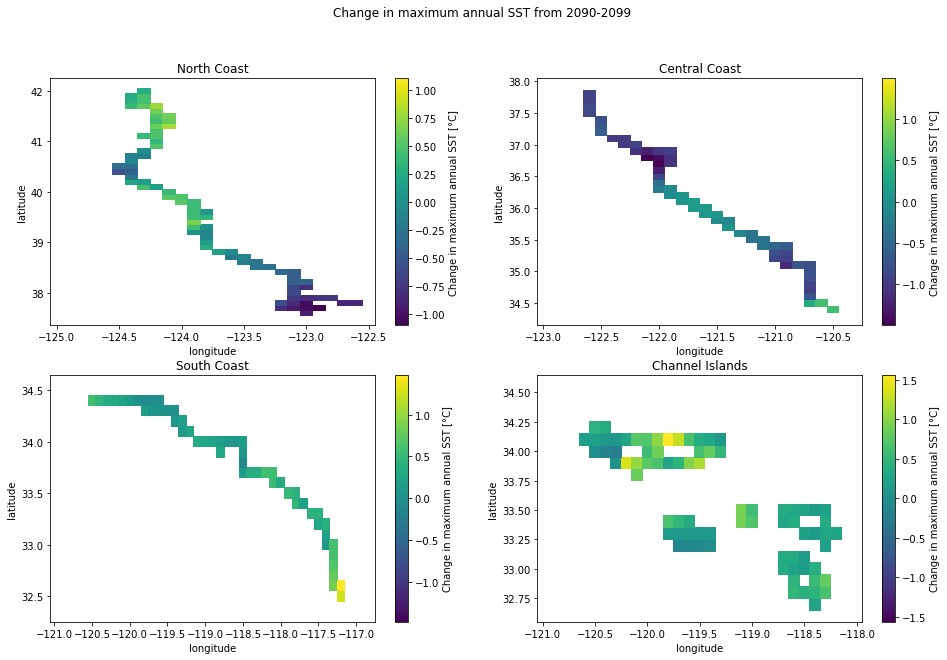

In [20]:
# Plot of change in annual maximum SST, from 2090-2099


fig_max_sst_2090, axes = plt.subplots(ncols = 2, nrows = 2)
fig_max_sst_2090.set_size_inches(16,10)

fig1 = (northcoast_max_sst_change['sst_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.3,3.6,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)

fig2 = (centralcoast_max_sst_change['sst_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.3,3.6,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_max_sst_change['sst_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.3,3.6,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_max_sst_change['sst_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(1.3,3.6,.1),
           cbar_kwargs = {'label': 'Change in maximum annual SST [°C]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_max_sst_2090.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_max_sst_2090.suptitle('Change in maximum annual SST from 2090-2099') 

# fig_mean_sst_2090.savefig('Figures/ROMS_plots/bioregions_maxSST_2090_2099.png')


---
### Mean Chlorophyll (% changes)

Text(0.5, 0.98, 'Change in annual mean chlorophyll from 2000-2009')

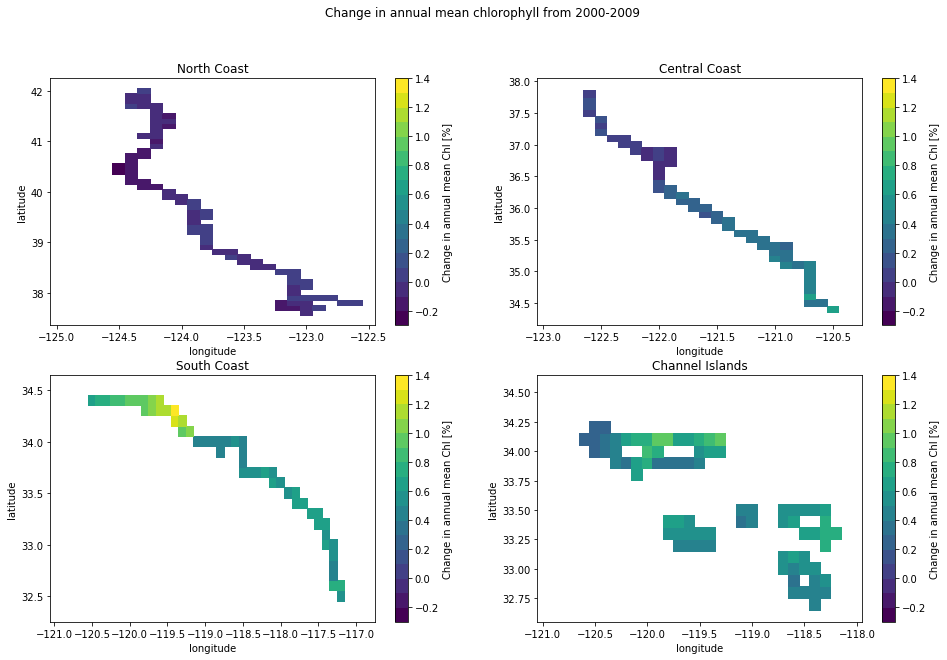

In [21]:
# Plot of percent change in annual mean chlorophyll, from 2000-2009

fig_mean_chl_2000, axes = plt.subplots(ncols = 2, nrows = 2)
fig_mean_chl_2000.set_size_inches(16,10)

fig1 = (northcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.3,1.5,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)


fig2 = (centralcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.3,1.5,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.3,1.5,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2000-2009')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.3,1.5,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_mean_chl_2000.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_chl_2000.suptitle('Change in annual mean chlorophyll from 2000-2009') 

# fig_mean_chl_2000.savefig('Figures/ROMS_plots/bioregions_meanChl_2000_2009.png')


Text(0.5, 0.98, 'Change in annual mean chlorophyll from 2010-2019')

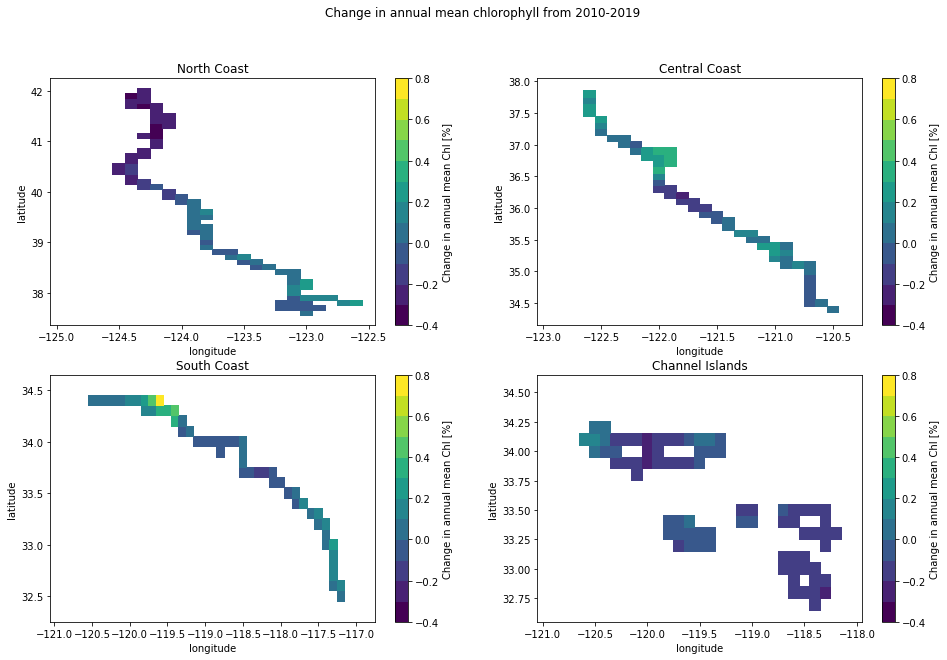

In [22]:
# Plot of percent change in annual mean chlorophyll, from 2010-2019

fig_mean_chl_2010, axes = plt.subplots(ncols = 2, nrows = 2)
fig_mean_chl_2010.set_size_inches(16,10)

fig1 = (northcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.4,0.9,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)


fig2 = (centralcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.4,0.9,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.4,0.9,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2010-2019')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.4,0.9,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_mean_chl_2010.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_chl_2010.suptitle('Change in annual mean chlorophyll from 2010-2019') 

# fig_mean_chl_2010.savefig('Figures/ROMS_plots/bioregions_meanChl_2010_2019.png')


Text(0.5, 0.98, 'Change in annual mean chlorophyll from 2020-2029')

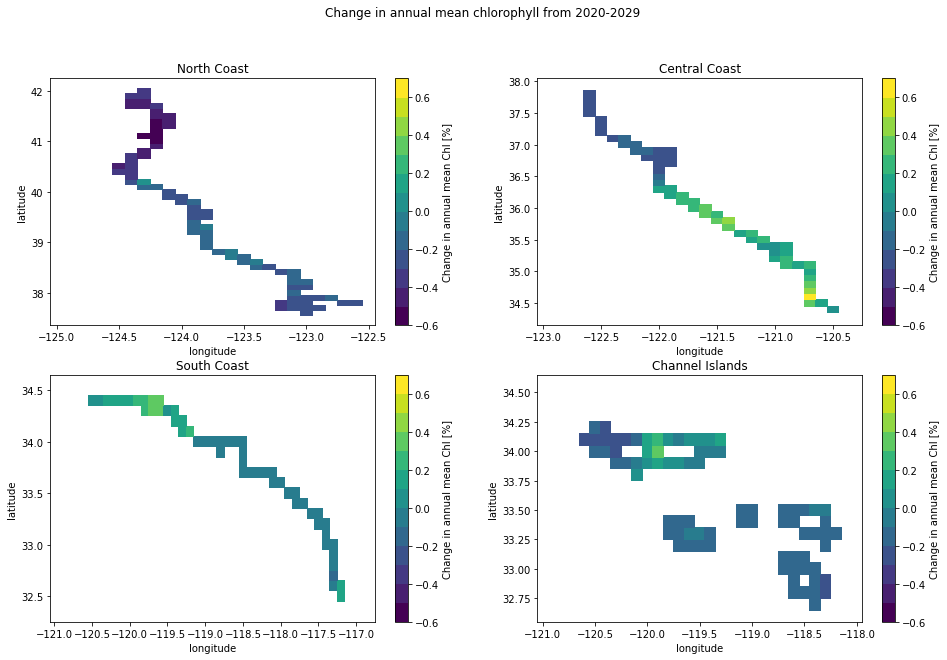

In [23]:
# Plot of percent change in annual mean chlorophyll, from 2020-2029

fig_mean_chl_2020, axes = plt.subplots(ncols = 2, nrows = 2)
fig_mean_chl_2020.set_size_inches(16,10)

fig1 = (northcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.6,0.8,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)


fig2 = (centralcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.6,0.8,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.6,0.8,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2020-2029')
     .plot(x = 'longitude', 
           y = 'latitude',
           levels = np.arange(-0.6,0.8,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_mean_chl_2020.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_chl_2020.suptitle('Change in annual mean chlorophyll from 2020-2029') 

# fig_mean_chl_2020.savefig('Figures/ROMS_plots/bioregions_meanChl_2020_2029.png')


Text(0.5, 0.98, 'Change in annual mean chlorophyll from 2090-2099')

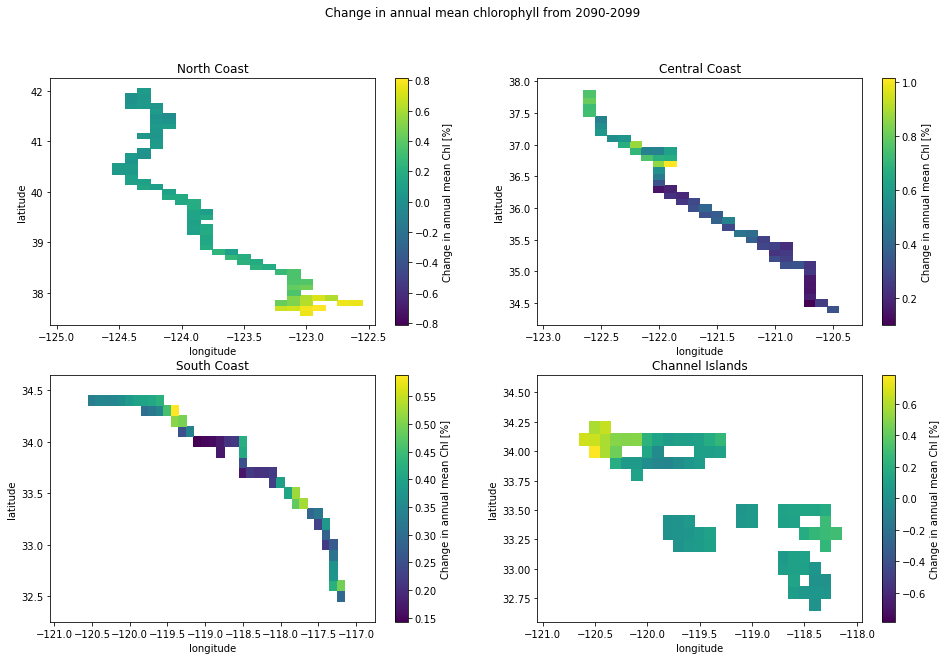

In [24]:
# Plot of percent change in annual mean chlorophyll, from 2020-2099

fig_mean_chl_2090, axes = plt.subplots(ncols = 2, nrows = 2)
fig_mean_chl_2090.set_size_inches(16,10)

fig1 = (northcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(37.4, 42.2))
     .sel(longitude = slice(-125, -122.5))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(-0.3,0.6,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,0]
          )
)


fig2 = (centralcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(34.2, 38))
     .sel(longitude = slice(-123, -120.3))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(-0.3,0.6,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[0,1],
          )
)

fig3 = (southcoast_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.3, 34.6))
     .sel(longitude = slice(-121, -116.75))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(-0.3,0.6,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,0],
          )
)

fig4 = (channelislands_mean_chl_change['chl_surf_change'].sel(latitude = slice(32.6, 34.6))
     .sel(longitude = slice(-121, -118))
     .sel(timeframe = 'change_2090-2099')
     .plot(x = 'longitude', 
           y = 'latitude',
#            levels = np.arange(-0.3,0.6,.1),
           cbar_kwargs = {'label': 'Change in annual mean Chl [%]'},
           cmap = plt.cm.viridis,
           ax = axes[1,1],
          )
)

axes[0,0].set_title('North Coast')
axes[0,1].set_title('Central Coast')
axes[1,0].set_title('South Coast')
axes[1,1].set_title('Channel Islands')

fig_mean_chl_2090.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
fig_mean_chl_2090.suptitle('Change in annual mean chlorophyll from 2090-2099') 

# fig_mean_chl_2090.savefig('Figures/ROMS_plots/bioregions_meanChl_2090_2099.png')


In [99]:
# function to generate a moving decade-change timeseries

def get_decadal_change(dataset, variable, change_type,):
    year_series = dataset['year'].values
    year_range = range(min(year_series),max(year_series)+1)
    
    for i, yr in enumerate(year_series):
        if yr + 10 in year_range:
            if change_type == 'abs':
                change_ds = (dataset.sel(year = yr + 10)[variable] - dataset.sel(year = yr)[variable]
                                 .to_dataset())
            elif change_type == 'pct':
                change_ds = ((dataset.sel(year = yr + 10)[variable] - dataset.sel(year = yr)[variable])/dataset.sel(year = yr)[variable]
                                 .to_dataset())
                
            change_ds.coords['year'] = yr + 10
            change_ds[variable] = change_ds[variable].assign_coords(year = yr + 10)
            
            if i == 0:
                ds_all = change_ds
            else:
                ds_all = xr.concat([ds_all, change_ds], dim = 'year')
            
    return ds_all

In [102]:
# generate timeseries of rolling decadal change

mean_sst_decadal_change = get_decadal_change(annual_mean_sst, 'sst', 'abs')
max_sst_decadal_change = get_decadal_change(annual_max_sst, 'sst', 'abs')
mean_chl_decadal_change = get_decadal_change(annual_mean_chl, 'chl_surf', 'pct')

---

## Extracting data at different spatial scales

In [28]:
# function to extract mean, and upper/lower range bounds from a gridded dataset, based on an input shapefile

def get_shapefile_stats(dataset, shapefile, label):
    shapefile_mean = (dataset.salem.roi(shape = shapefile, all_touched = True)
                           .mean(dim = ['longitude', 'latitude'], skipna = True)
                           .to_array()
                           .to_pandas()
                           .reset_index()
                      )
    shapefile_mean = pd.melt(shapefile_mean, value_vars = shapefile_mean.columns[1:].to_numpy(), value_name='mean')
    
    shapefile_max = (dataset.salem.roi(shape = shapefile, all_touched = True)
                           .max(dim = ['longitude', 'latitude'], skipna = True)
                           .to_array()
                           .to_pandas()
                           .reset_index()
                      )
    shapefile_max = pd.melt(shapefile_max, value_vars = shapefile_max.columns[1:].to_numpy(), value_name='max')

    shapefile_min = (dataset.salem.roi(shape = shapefile, all_touched = True)
                           .min(dim = ['longitude', 'latitude'], skipna = True)
                           .to_array()
                           .to_pandas()
                           .reset_index()
                      )
    shapefile_min = pd.melt(shapefile_min, value_vars = shapefile_min.columns[1:].to_numpy(), value_name='min')

    
    shapefile_stats = (shapefile_mean.merge(shapefile_max, how = 'left', on = shapefile_mean.columns[0])
                           .merge(shapefile_min, how = 'left', on = shapefile_mean.columns[0])
                      )    
    
    shapefile_stats['area'] = label

    return shapefile_stats

----

### Timeseries of SST


In [66]:
# Create dataframes of annual mean SST for different shapefiles

mean_sst_ts_north = pd.concat([
    get_shapefile_stats(annual_mean_sst, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(annual_mean_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_sst, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(annual_mean_sst, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

mean_sst_ts_central = pd.concat([
    get_shapefile_stats(annual_mean_sst, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(annual_mean_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_sst, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(annual_mean_sst, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

mean_sst_ts_south = pd.concat([
    get_shapefile_stats(annual_mean_sst, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(annual_mean_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_sst, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(annual_mean_sst, mpa_southcoast_shape, 'South Coast Bioregion MPAs')   
])
    
mean_sst_ts_channelislands = pd.concat([
    get_shapefile_stats(annual_mean_sst, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(annual_mean_sst, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(annual_mean_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_sst, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(annual_mean_sst, mpa_channelislands_shape, 'Channel Islands MPAs')   
])    
    
mean_sst_ts_bioregions = pd.concat([
    get_shapefile_stats(annual_mean_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_sst, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(annual_mean_sst, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(annual_mean_sst, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(annual_mean_sst, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

mean_sst_ts_mpas = pd.concat([
    get_shapefile_stats(annual_mean_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_sst, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(annual_mean_sst, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(annual_mean_sst, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(annual_mean_sst, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(annual_mean_sst, mpa_northcoast_shape, 'North Coast Bioregion MPAs')  
]) 

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

----

### Timeseries of max SST


In [67]:
# Create dataframes of annual max SST for different shapefiles

max_sst_ts_north = pd.concat([
    get_shapefile_stats(annual_max_sst, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(annual_max_sst, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(annual_max_sst, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(annual_max_sst, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(annual_max_sst, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(annual_max_sst, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(annual_max_sst, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(annual_max_sst, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(annual_max_sst, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(annual_max_sst, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(annual_max_sst, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(annual_max_sst, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(annual_max_sst, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(annual_max_sst, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(annual_max_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_max_sst, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(annual_max_sst, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

max_sst_ts_central = pd.concat([
    get_shapefile_stats(annual_max_sst, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(annual_max_sst, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(annual_max_sst, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(annual_max_sst, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(annual_max_sst, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(annual_max_sst, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(annual_max_sst, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(annual_max_sst, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(annual_max_sst, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(annual_max_sst, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(annual_max_sst, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(annual_max_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_max_sst, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(annual_max_sst, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

max_sst_ts_south = pd.concat([
    get_shapefile_stats(annual_max_sst, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(annual_max_sst, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(annual_max_sst, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(annual_max_sst, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(annual_max_sst, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(annual_max_sst, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(annual_max_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_max_sst, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(annual_max_sst, mpa_southcoast_shape, 'South Coast Bioregion MPAs')   
])
    
max_sst_ts_channelislands = pd.concat([
    get_shapefile_stats(annual_max_sst, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(annual_max_sst, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(annual_max_sst, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(annual_max_sst, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(annual_max_sst, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(annual_max_sst, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(annual_max_sst, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(annual_max_sst, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(annual_max_sst, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(annual_max_sst, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(annual_max_sst, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(annual_max_sst, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(annual_max_sst, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(annual_max_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_max_sst, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(annual_max_sst, mpa_channelislands_shape, 'Channel Islands MPAs')   
])    
    
max_sst_ts_bioregions = pd.concat([
    get_shapefile_stats(annual_max_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_max_sst, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(annual_max_sst, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(annual_max_sst, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(annual_max_sst, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

max_sst_ts_mpas = pd.concat([
    get_shapefile_stats(annual_max_sst, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_max_sst, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(annual_max_sst, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(annual_max_sst, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(annual_max_sst, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(annual_max_sst, mpa_northcoast_shape, 'North Coast Bioregion MPAs')  
]) 

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

----

### Timeseries of chlorophyll


In [68]:
# Create dataframes of annual mean Chl for different shapefiles

mean_chl_ts_north = pd.concat([
    get_shapefile_stats(annual_mean_chl, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(annual_mean_chl, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_chl, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(annual_mean_chl, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

mean_chl_ts_central = pd.concat([
    get_shapefile_stats(annual_mean_chl, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(annual_mean_chl, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_chl, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(annual_mean_chl, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

mean_chl_ts_south = pd.concat([
    get_shapefile_stats(annual_mean_chl, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(annual_mean_chl, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_chl, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(annual_mean_chl, mpa_southcoast_shape, 'South Coast Bioregion MPAs')   
])
    
mean_chl_ts_channelislands = pd.concat([
    get_shapefile_stats(annual_mean_chl, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(annual_mean_chl, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(annual_mean_chl, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_chl, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(annual_mean_chl, mpa_channelislands_shape, 'Channel Islands MPAs')   
])    
    
mean_chl_ts_bioregions = pd.concat([
    get_shapefile_stats(annual_mean_chl, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_chl, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(annual_mean_chl, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(annual_mean_chl, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(annual_mean_chl, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

mean_chl_ts_mpas = pd.concat([
    get_shapefile_stats(annual_mean_chl, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(annual_mean_chl, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(annual_mean_chl, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(annual_mean_chl, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(annual_mean_chl, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(annual_mean_chl, mpa_northcoast_shape, 'North Coast Bioregion MPAs')  
]) 

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

In [72]:
# write data out to csv
mean_sst_ts_north.to_csv("Data/ROMS_Processed_Files/northcoast_timeseries_MeanSST.csv", index = False)
mean_sst_ts_central.to_csv("Data/ROMS_Processed_Files/centralcoast_timeseries_MeanSST.csv", index = False)
mean_sst_ts_south.to_csv("Data/ROMS_Processed_Files/southcoast_timeseries_MeanSST.csv", index = False)
mean_sst_ts_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_timeseries_MeanSST.csv", index = False)
mean_sst_ts_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_timeseries_MeanSST.csv", index = False)
mean_sst_ts_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_timeseries_MeanSST.csv", index = False)

mean_chl_ts_north.to_csv("Data/ROMS_Processed_Files/northcoast_timeseries_MeanChl.csv", index = False)
mean_chl_ts_central.to_csv("Data/ROMS_Processed_Files/centralcoast_timeseries_MeanChl.csv", index = False)
mean_chl_ts_south.to_csv("Data/ROMS_Processed_Files/southcoast_timeseries_MeanChl.csv", index = False)
mean_chl_ts_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_timeseries_MeanChl.csv", index = False)
mean_chl_ts_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_timeseries_MeanChl.csv", index = False)
mean_chl_ts_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_timeseries_MeanChl.csv", index = False)

max_sst_ts_north.to_csv("Data/ROMS_Processed_Files/northcoast_timeseries_MaxSST.csv", index = False)
max_sst_ts_central.to_csv("Data/ROMS_Processed_Files/centralcoast_timeseries_MaxSST.csv", index = False)
max_sst_ts_south.to_csv("Data/ROMS_Processed_Files/southcoast_timeseries_MaxSST.csv", index = False)
max_sst_ts_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_timeseries_MaxSST.csv", index = False)
max_sst_ts_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_timeseries_MaxSST.csv", index = False)
max_sst_ts_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_timeseries_MaxSST.csv", index = False)


----

### Timeseries of decadal mean SST


In [105]:
# Create dataframes of decadal change in annual mean SST for different shapefiles

mean_sst_decadalchange_north = pd.concat([
    get_shapefile_stats(mean_sst_decadal_change, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(mean_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

mean_sst_decadalchange_central = pd.concat([
    get_shapefile_stats(mean_sst_decadal_change, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(mean_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

mean_sst_decadalchange_south = pd.concat([
    get_shapefile_stats(mean_sst_decadal_change, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(mean_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_southcoast_shape, 'South Coast Bioregion MPAs')   
])
    
mean_sst_decadalchange_channelislands = pd.concat([
    get_shapefile_stats(mean_sst_decadal_change, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(mean_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_channelislands_shape, 'Channel Islands MPAs')   
])    
    
mean_sst_decadalchange_bioregions = pd.concat([
    get_shapefile_stats(mean_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(mean_sst_decadal_change, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

mean_sst_decadalchange_mpas = pd.concat([
    get_shapefile_stats(mean_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_sst_decadal_change, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(mean_sst_decadal_change, mpa_northcoast_shape, 'North Coast Bioregion MPAs')  
]) 

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

In [106]:
mean_sst_decadalchange_north.to_csv("Data/ROMS_Processed_Files/northcoast_decadalchange_MeanSST.csv", index = False)
mean_sst_decadalchange_central.to_csv("Data/ROMS_Processed_Files/centralcoast_decadalchange_MeanSST.csv", index = False)
mean_sst_decadalchange_south.to_csv("Data/ROMS_Processed_Files/southcoast_decadalchange_MeanSST.csv", index = False)
mean_sst_decadalchange_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_decadalchange_MeanSST.csv", index = False)
mean_sst_decadalchange_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_decadalchange_MeanSST.csv", index = False)
mean_sst_decadalchange_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_decadalchange_MeanSST.csv", index = False)


----

### Timeseries of decadal max SST


In [107]:
# Create dataframes of decadal change in annual mean SST for different shapefiles

max_sst_decadalchange_north = pd.concat([
    get_shapefile_stats(max_sst_decadal_change, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(max_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(max_sst_decadal_change, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

max_sst_decadalchange_central = pd.concat([
    get_shapefile_stats(max_sst_decadal_change, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(max_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(max_sst_decadal_change, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

max_sst_decadalchange_south = pd.concat([
    get_shapefile_stats(max_sst_decadal_change, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(max_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(max_sst_decadal_change, mpa_southcoast_shape, 'South Coast Bioregion MPAs')   
])
    
max_sst_decadalchange_channelislands = pd.concat([
    get_shapefile_stats(max_sst_decadal_change, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(max_sst_decadal_change, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(max_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(max_sst_decadal_change, mpa_channelislands_shape, 'Channel Islands MPAs')   
])    
    
max_sst_decadalchange_bioregions = pd.concat([
    get_shapefile_stats(max_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(max_sst_decadal_change, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

max_sst_decadalchange_mpas = pd.concat([
    get_shapefile_stats(max_sst_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(max_sst_decadal_change, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(max_sst_decadal_change, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(max_sst_decadal_change, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(max_sst_decadal_change, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(max_sst_decadal_change, mpa_northcoast_shape, 'North Coast Bioregion MPAs')  
]) 

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

In [108]:
max_sst_decadalchange_north.to_csv("Data/ROMS_Processed_Files/northcoast_decadalchange_MaxSST.csv", index = False)
max_sst_decadalchange_central.to_csv("Data/ROMS_Processed_Files/centralcoast_decadalchange_MaxSST.csv", index = False)
max_sst_decadalchange_south.to_csv("Data/ROMS_Processed_Files/southcoast_decadalchange_MaxSST.csv", index = False)
max_sst_decadalchange_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_decadalchange_MaxSST.csv", index = False)
max_sst_decadalchange_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_decadalchange_MaxSST.csv", index = False)
max_sst_decadalchange_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_decadalchange_MaxSST.csv", index = False)


----

### Timeseries of decadal mean Chl


In [109]:
# Create dataframes of decadal change in annual mean SST for different shapefiles

mean_chl_decadalchange_north = pd.concat([
    get_shapefile_stats(mean_chl_decadal_change, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(mean_chl_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

mean_chl_decadalchange_central = pd.concat([
    get_shapefile_stats(mean_chl_decadal_change, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(mean_chl_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

mean_chl_decadalchange_south = pd.concat([
    get_shapefile_stats(mean_chl_decadal_change, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(mean_chl_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_southcoast_shape, 'South Coast Bioregion MPAs')   
])
    
mean_chl_decadalchange_channelislands = pd.concat([
    get_shapefile_stats(mean_chl_decadal_change, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(mean_chl_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_channelislands_shape, 'Channel Islands MPAs')   
])    
    
mean_chl_decadalchange_bioregions = pd.concat([
    get_shapefile_stats(mean_chl_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(mean_chl_decadal_change, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

mean_chl_decadalchange_mpas = pd.concat([
    get_shapefile_stats(mean_chl_decadal_change, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(mean_chl_decadal_change, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(mean_chl_decadal_change, mpa_northcoast_shape, 'North Coast Bioregion MPAs')  
]) 

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

In [110]:
mean_chl_decadalchange_north.to_csv("Data/ROMS_Processed_Files/northcoast_decadalchange_MeanChl.csv", index = False)
mean_chl_decadalchange_central.to_csv("Data/ROMS_Processed_Files/centralcoast_decadalchange_MeanChl.csv", index = False)
mean_chl_decadalchange_south.to_csv("Data/ROMS_Processed_Files/southcoast_decadalchange_MeanChl.csv", index = False)
mean_chl_decadalchange_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_decadalchange_MeanChl.csv", index = False)
mean_chl_decadalchange_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_decadalchange_MeanChl.csv", index = False)
mean_chl_decadalchange_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_decadalchange_MeanChl.csv", index = False)


---

### Timeseries of change

In [58]:
# Create dataframes of mean SST change statistics for different shapefiles - 5 year

mean_sst_tschange_5year_north = pd.concat([
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

mean_sst_tschange_5year_central = pd.concat([
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

mean_sst_tschange_5year_south = pd.concat([
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_southcoast_shape, 'South Coast Bioregion MPAs')
    
    
])
    
mean_sst_tschange_5year_channelislands = pd.concat([
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(timeseries_mean_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_channelislands_shape, 'Channel Islands MPAs')
    
    
])    
    
mean_sst_tschange_5year_bioregions = pd.concat([
    get_shapefile_stats(timeseries_mean_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_sst_change_5, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

mean_sst_tschange_5year_mpas = pd.concat([
    get_shapefile_stats(timeseries_mean_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_sst_change_5, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(timeseries_mean_sst_change_5, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
    
])   
    

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

In [56]:
# Create dataframes of mean Chl change statistics for different shapefiles - 5 year

mean_chl_tschange_5year_north = pd.concat([
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_northcoast_shape, 'North Coast Bioregion MPAs'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_northcoast_shape, 'North Coast Bioregion')
    
])

mean_chl_tschange_5year_central = pd.concat([
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

mean_chl_tschange_5year_south = pd.concat([
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_southcoast_shape, 'South Coast Bioregion MPAs')
    
    
])
    
mean_chl_tschange_5year_channelislands = pd.concat([
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(timeseries_mean_chl_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_channelislands_shape, 'Channel Islands MPAs')
])    
    
mean_chl_tschange_5year_bioregions = pd.concat([
    get_shapefile_stats(timeseries_mean_chl_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(timeseries_mean_chl_change_5, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

mean_chl_tschange_5year_mpas = pd.concat([
    get_shapefile_stats(timeseries_mean_chl_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_mean_chl_change_5, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(timeseries_mean_chl_change_5, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
    
])   
    

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

In [60]:
# Create dataframes of max SST change statistics for different shapefiles - 5 year

max_sst_tschange_5year_north = pd.concat([
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_readingrock_smr_shape, 'Reading Rock SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_capemendocino_smr_shape, 'South Cape Mendocino SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_mattolecanyon_smr_shape, 'Mattole Canyon SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_sealiongulch_smr_shape, 'Sea Lion Gulch SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_tenmile_smr_shape, 'Ten Mile SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pointcabrillo_smr_shape, 'Point Cabrillo SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pointarena_smr_shape, 'Point Arena SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_delmar_smr_shape, 'Del Mar Landing SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_stewartspoint_smr_shape, 'Stewarts Point SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_gerstlecove_smrma_shape, 'Gerstle Cove SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_bodegahead_smr_shape, 'Bodega Head SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pointreyes_smr_shape, 'Point Reyes SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_northfarallon_smr_shape, 'North Farallon Islands SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_southeastfarallon_smr_shape, 'Southeast Farallon Island SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_northcoast_shape, 'North Coast Bioregion'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
])

max_sst_tschange_5year_central = pd.concat([
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_anonuevo_smr_shape, 'Ano Nuevo SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_naturalbridges_smr_shape, 'Natural Bridges SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_asilomar_smr_shape, 'Asilomar SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pinnacles_smr_shape, 'Carmel Pinnacles SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pointlobos_smr_shape, 'Point Lobos SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pointsur_smr_shape, 'Point Sur SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_bigcreek_smr_shape, 'Big Creek SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_piedrasblancas_smr_shape, 'Piedras Blancas SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_morrobay_smr_shape, 'Morro Bay SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_buchon_smr_shape, 'Point Buchon SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_vandenberg_smr_shape, 'Vandenberg SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs')
])

max_sst_tschange_5year_south = pd.concat([
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pointconception_smr_shape, 'Point Conception SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_pointdume_smr_shape, 'Point Dume SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_lagunabeach_smr_shape, 'Laguna Beach SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_matlahuayl_smr_shape, 'Matlahuayl SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_lajolla_smr_shape, 'South La Jolla SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_cabrillo_smr_shape, 'Cabrillo SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_southcoast_shape, 'South Coast Bioregion MPAs')
    
    
])
    
max_sst_tschange_5year_channelislands = pd.concat([
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_richardsonrock_smr_shape, 'Richardson Rock SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_harrispoint_smr_shape, 'Harris Point SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_judithpoint_smr_shape, 'Judith Rock SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_carringtonpoint_smr_shape, 'Carrington Point SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_skunkpoint_smr_shape, 'Skunk Point SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_southpoint_smr_shape, 'South Point SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_gullisland_smr_shape, 'Gull Island SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_scorpion_smr_shape, 'Scorpion SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_anacapa_smr_shape, 'Anacapa Island SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_footprint_smr_shape, 'Footprint SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_beggrock_smr_shape, 'Begg Rock SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_santabarbara_smr_shape, 'Santa Barbara Island SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_longpoint_smr_shape, 'Long Point SMR'),
    get_shapefile_stats(timeseries_max_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_channelislands_shape, 'Channel Islands MPAs')
    
    
])    
    
max_sst_tschange_5year_bioregions = pd.concat([
    get_shapefile_stats(timeseries_max_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_channelislands_shape, 'Channel Islands Bioregion'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_southcoast_shape, 'South Coast Bioregion'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_centralcoast_shape, 'Central Coast Bioregion'),
    get_shapefile_stats(timeseries_max_sst_change_5, bioregion_northcoast_shape, 'North Coast Bioregion')
])
    

max_sst_tschange_5year_mpas = pd.concat([
    get_shapefile_stats(timeseries_max_sst_change_5, ca_bioregions, 'California State Waters'),
    get_shapefile_stats(timeseries_max_sst_change_5, ca_mpas, 'All California MPAs'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_channelislands_shape, 'Channel Islands MPAs'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_southcoast_shape, 'South Coast Bioregion MPAs'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_centralcoast_shape, 'Central Coast Bioregion MPAs'),
    get_shapefile_stats(timeseries_max_sst_change_5, mpa_northcoast_shape, 'North Coast Bioregion MPAs')
    
])   
    

/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning

In [70]:
# write data out to csv
mean_sst_tschange_5year_north.to_csv("Data/ROMS_Processed_Files/northcoast_changetimeseries_MeanSST.csv", index = False)
mean_sst_tschange_5year_central.to_csv("Data/ROMS_Processed_Files/centralcoast_changetimeseries_MeanSST.csv", index = False)
mean_sst_tschange_5year_south.to_csv("Data/ROMS_Processed_Files/southcoast_changetimeseries_MeanSST.csv", index = False)
mean_sst_tschange_5year_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_changetimeseries_MeanSST.csv", index = False)
mean_sst_tschange_5year_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_changetimeseries_MeanSST.csv", index = False)
mean_sst_tschange_5year_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_changetimeseries_MeanSST.csv", index = False)

mean_chl_tschange_5year_north.to_csv("Data/ROMS_Processed_Files/northcoast_changetimeseries_MeanChl.csv", index = False)
mean_chl_tschange_5year_central.to_csv("Data/ROMS_Processed_Files/centralcoast_changetimeseries_MeanChl.csv", index = False)
mean_chl_tschange_5year_south.to_csv("Data/ROMS_Processed_Files/southcoast_changetimeseries_MeanChl.csv", index = False)
mean_chl_tschange_5year_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_changetimeseries_MeanChl.csv", index = False)
mean_chl_tschange_5year_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_changetimeseries_MeanChl.csv", index = False)
mean_chl_tschange_5year_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_changetimeseries_MeanChl.csv", index = False)

max_sst_tschange_5year_north.to_csv("Data/ROMS_Processed_Files/northcoast_changetimeseries_MaxSST.csv", index = False)
max_sst_tschange_5year_central.to_csv("Data/ROMS_Processed_Files/centralcoast_changetimeseries_MaxSST.csv", index = False)
max_sst_tschange_5year_south.to_csv("Data/ROMS_Processed_Files/southcoast_changetimeseries_MaxSST.csv", index = False)
max_sst_tschange_5year_channelislands.to_csv("Data/ROMS_Processed_Files/channelislands_changetimeseries_MaxSST.csv", index = False)
max_sst_tschange_5year_bioregions.to_csv("Data/ROMS_Processed_Files/bioregions_changetimeseries_MaxSST.csv", index = False)
max_sst_tschange_5year_mpas.to_csv("Data/ROMS_Processed_Files/MPAs_changetimeseries_MaxSST.csv", index = False)



In [31]:
# create dataframes with statistics for different spatial scales
mean_sst_change_byregion = pd.concat([
    get_shapefile_stats(annual_mean_sst_change, mpa_lobos_smr_shape, 'Point Lobos MPA'),
    get_shapefile_stats(annual_mean_sst_change, mpa_centralcoast_shape, 'Central Bioregion MPAs'),
    get_shapefile_stats(annual_mean_sst_change, bioregion_centralcoast_shape, 'Central Bioregion'),
    get_shapefile_stats(annual_mean_sst_change, ca_bioregions, 'California State Waters')
])

max_sst_change_byregion = pd.concat([
    get_shapefile_stats(annual_max_sst_change, mpa_lobos_smr_shape, 'Point Lobos MPA'),
    get_shapefile_stats(annual_max_sst_change, mpa_centralcoast_shape, 'Central Bioregion MPAs'),
    get_shapefile_stats(annual_max_sst_change, bioregion_centralcoast_shape, 'Central Bioregion'),
    get_shapefile_stats(annual_max_sst_change, ca_bioregions, 'California State Waters')
])

mean_chl_change_byregion = pd.concat([
    get_shapefile_stats(annual_mean_chl_change, mpa_lobos_smr_shape, 'Point Lobos MPA'),
    get_shapefile_stats(annual_mean_chl_change, mpa_centralcoast_shape, 'Central Bioregion MPAs'),
    get_shapefile_stats(annual_mean_chl_change, bioregion_centralcoast_shape, 'Central Bioregion'),
    get_shapefile_stats(annual_mean_chl_change, ca_bioregions, 'California State Waters')
])

In [66]:
plotnine.options.figure_size = (15, 8)

In [69]:
mean_sst_change_byregion

,timeframe,mean_change,max_change,min_change,area
0,sst_change,1.090166,2.762577,-0.191154,Point Lobos MPA
0,sst_change,1.015135,3.085731,-0.706097,Central Bioregion MPAs
0,sst_change,1.004461,3.104208,-0.926811,Central Bioregion
0,sst_change,0.923184,3.133064,-1.462761,California State Waters


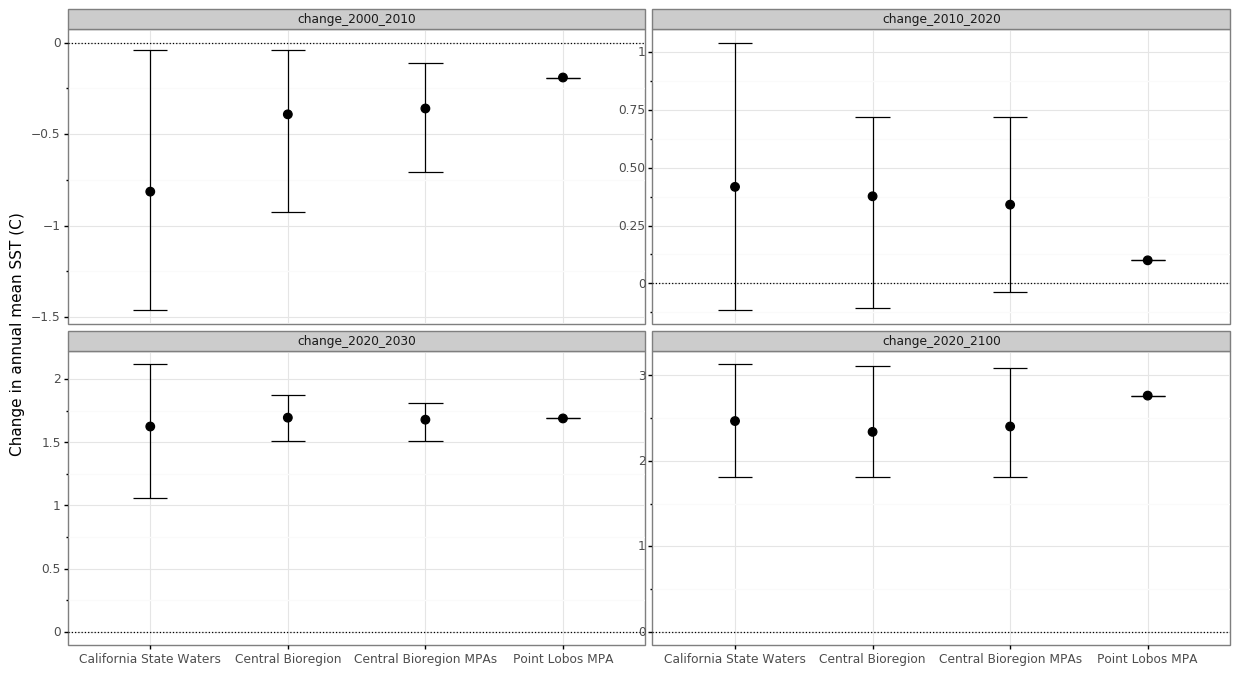

<ggplot: (8782287598225)>

In [74]:
gg_mean_sst_change =(ggplot(mean_sst_change_byregion, aes(x = 'area', y = 'mean_change')) +
     geom_hline(yintercept = 0, linetype = 'dotted') +
     geom_point(size = 3) +
     geom_errorbar(aes(ymin = 'min_change', ymax = 'max_change'), width = 0.25) +
     labs(x = '', y = 'Change in annual mean SST (C)') +
     facet_wrap('timeframe', ncol = 2, scales = 'free_y') +
     theme_bw()
)

gg_mean_sst_change

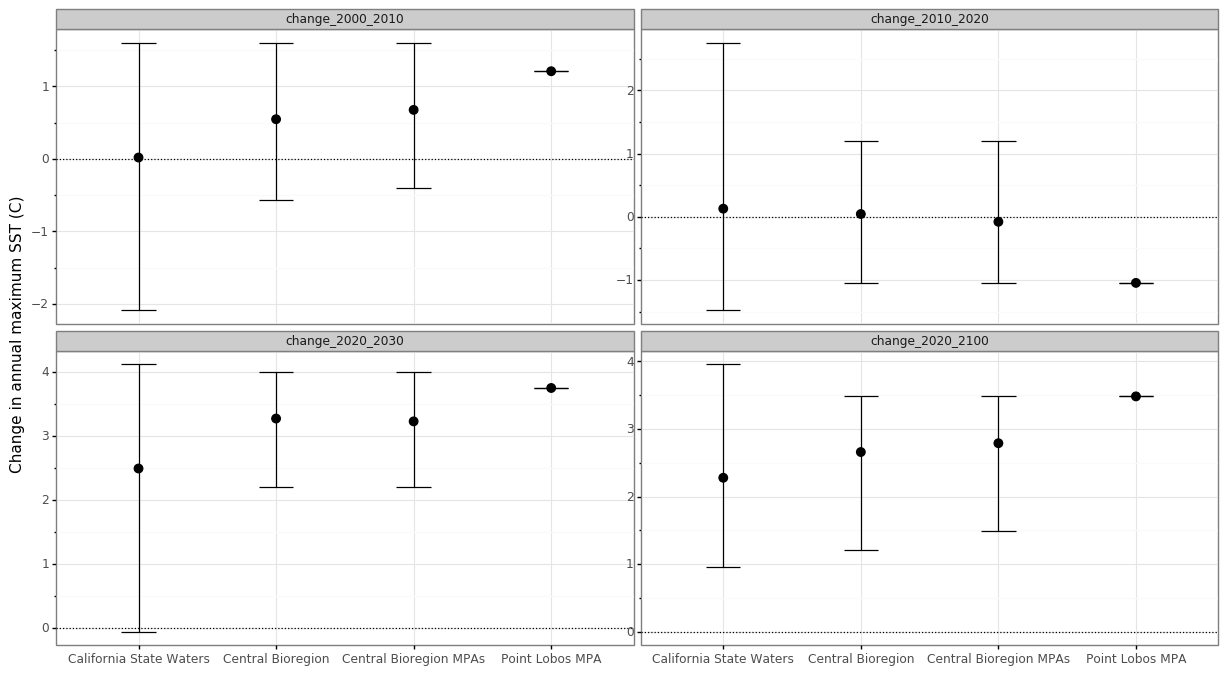

<ggplot: (8782230831485)>

In [76]:
gg_max_sst_change = (ggplot(max_sst_change_byregion, aes(x = 'area', y = 'mean_change')) +
     geom_hline(yintercept = 0, linetype = 'dotted') +
     geom_point(size = 3) +
     geom_errorbar(aes(ymin = 'min_change', ymax = 'max_change'), width = 0.25) +
     facet_wrap('timeframe', ncol = 2, scales = 'free_y') +
     labs(x = '', y = 'Change in annual maximum SST (C)') +
     theme_bw()
)

gg_max_sst_change

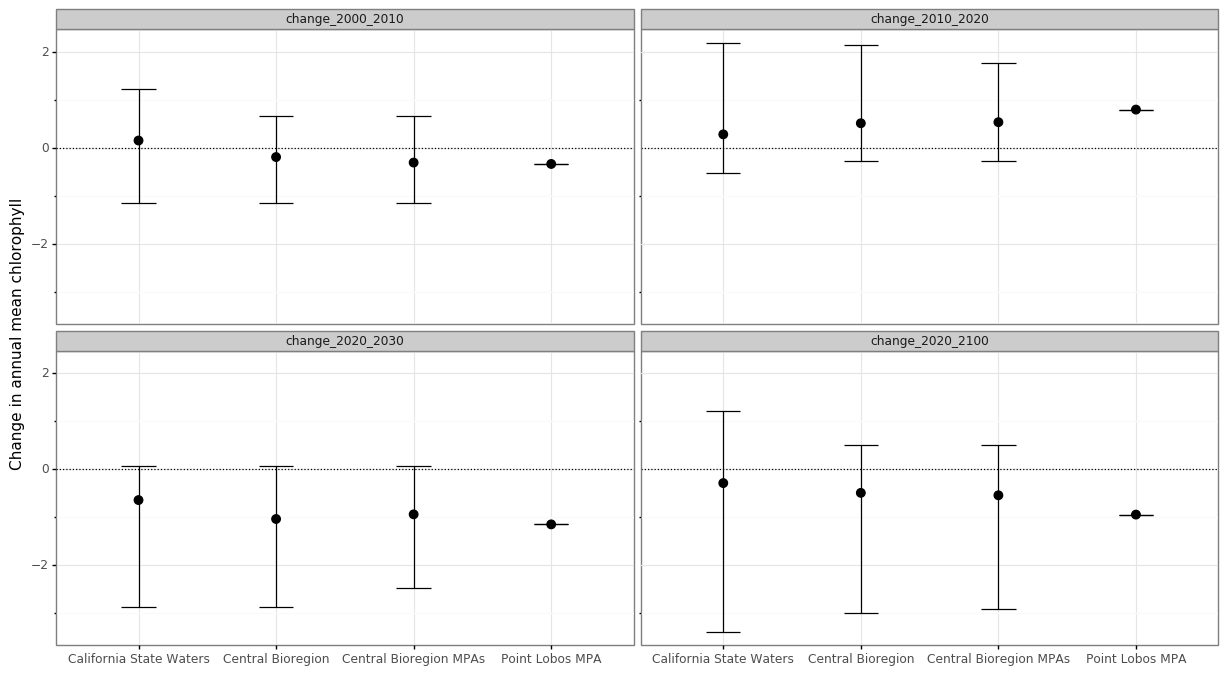

<ggplot: (8782330972305)>

In [77]:
gg_mean_chl_change = (ggplot(mean_chl_change_byregion, aes(x = 'area', y = 'mean_change')) +
     geom_hline(yintercept = 0, linetype = 'dotted') +
     geom_point(size = 3) +
     geom_errorbar(aes(ymin = 'min_change', ymax = 'max_change'), width = 0.25) +
     facet_wrap('timeframe', ncol = 2) +
     labs(x = '', y = 'Change in annual mean chlorophyll') +
     theme_bw()
)

gg_mean_chl_change

In [78]:
# save plots

gg_mean_sst_change.save('Figures/ROMS_mean_SST_change_by_scale.png')
gg_max_sst_change.save('Figures/ROMS_max_SST_change_by_scale.png')
gg_mean_chl_change.save('Figures/ROMS_mean_Chl_change_by_scale.png')


/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 15 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figures/ROMS_mean_SST_change_by_scale.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 15 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figures/ROMS_max_SST_change_by_scale.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 15 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/anaconda3/envs/mpa_env/lib/python3.7/site-packages/plotn